# Model Evaluation and Insights
---

### Objective
This notebook seeks to evaluate the most predictive models from the three logistic regressions as well as the random forests. Using the .pk file with saved model statistics, subreddit predictions are created. Examining confusions matrices provides insight into the accuracy metrics. From there, using coefficients or feature importances, the most indicative tokens from each model are obtained.

---
#### External Libraries Import

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from functions import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Evaluate Best Logistic Model

#### Read in Model Statistics

In [152]:
# read in .pk file with model stats on best logistic regression
lr_pack = pickle.load(open('./Best_Models/lr_package.pk' , 'rb'))
print(f"For the training data, this model produced a high R-squared score of {lr_pack['lr_pack'].best_score_}")

For the training data, this model produced a high R-squared score of 0.888663967611336


An R-squared score of 0.8886 implies that this model predicted 88.86% the posts to be in their correct subreddit of the training data set.

#### TF-IDF Transform Testing Data Using Best Parameters

In [5]:
# transform X_test using best parameters in order to make predictions

tf = TfidfVectorizer(max_features = 50000, ngram_range = (1, 2), stop_words = 'english')

X_train_tf = tf.fit_transform(lr_pack['X_train'])
X_test_tf = tf.transform(lr_pack['X_test'])

#### Create Predictions 

In [6]:
# make predictions

y_preds = lr_pack['lr_pack'].best_estimator_.named_steps['lr'].predict(X_test_tf)

#### Confusion Matrix

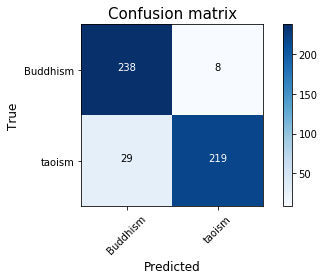

In [7]:
# create and plot a confusion matrix

cmlr = confusion_matrix(lr_pack['y_test'] , y_preds)
plot_confusion_matrix(cmlr, classes = lr_pack['y_test'].unique())

- The model predicted 29 posts to be in the Buddhism subreddit when they were actually in the Taoism subreddit. (89.1% accurate)
- The model predicted only 8 posts to be in the Taoism subreddit when they were actually in the Buddhism subreddit. (96.4% accurate)
- The remaining 457 posts were classified correctly. (92.5% accurate)

#### Fetch Most Important Tokens

In [80]:
# fetch coefficients produced by logistic regression
coefs = lr_pack['lr_pack'].best_estimator_.named_steps['lr'].coef_

# fetch tokens
tokens = lr_pack['lr_pack'].best_estimator_.named_steps['tf'].get_feature_names()

In [21]:
# put coefs and tokens into dataframe
vocab_coefs = pd.DataFrame({'word': tokens, 'coef' : coefs[0]})
pred_words = vocab_coefs.sort_values('coef', ascending=False)

#### Fetch Most Indicative Tokens for Taoism Subreddit

In [165]:
# print top 10 words for predicting the Taosim subreddit
vocab_coefs.sort_values('coef', ascending=False).head(10)

,word,coef
37622,taoism,14.791201
37857,taoist,13.333467
37414,tao,13.017650
6426,dao,6.113529
1983,ching,4.695603
6500,daoism,4.553426
1864,chi,4.541326
6541,daoist,3.941987
48757,wu,3.521240
49062,yang,3.316356


#### Visualize

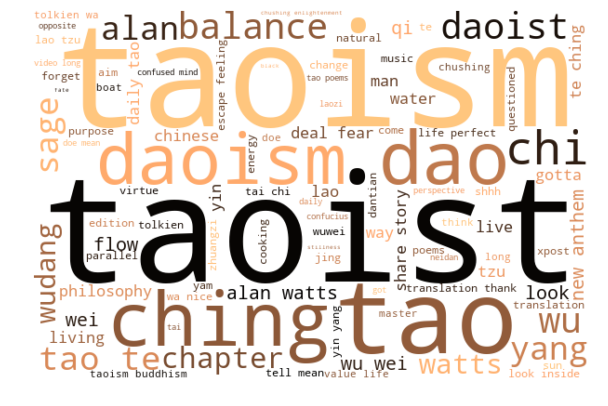

In [144]:
# top 100 words with their coefficients to predict Taoism Subreddit
tao_words = pred_words['word'].head(100)
tao_coefs = pred_words['coef'].head(100)

# normalize coefficients
tao_norm = [num / sum(tao_coefs) for num in tao_coefs]

# create bag of words with importance for purpose of word cloud
tao_top = np.random.choice(tao_words , size = 10000 , p = tao_norm)
tao_wc = ' '.join(tao_top)

# word cloud
wc = WordCloud(background_color = 'white' , width = 600 , height = 400,  colormap = 'copper').generate(tao_wc)
plt.figure(figsize = (10 , 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off');

- This word cloud displays the most indicative words that the logisitc regression model used to predict posts being in the Taoism subreddit specifically. These are the "give away" words for the Taoism subreddit.

#### Fetch Most Indicative Tokens for Buddhism Subreddit

In [164]:
# top 10 predictive words for the buddhism subreddit
bud_sorted = vocab_coefs.sort_values('coef', ascending=True)
bud_sorted.head(10)

,word,coef
1446,buddhism,-12.703504
1527,buddhist,-9.988369
1414,buddha,-9.345147
13433,karma,-4.630030
7918,dharma,-4.616352
36239,suffering,-4.077299
11404,feel,-3.855267
38352,teaching,-3.540830
1124,bhikkhu,-3.377372
28996,rinpoche,-3.365078


#### Visualize

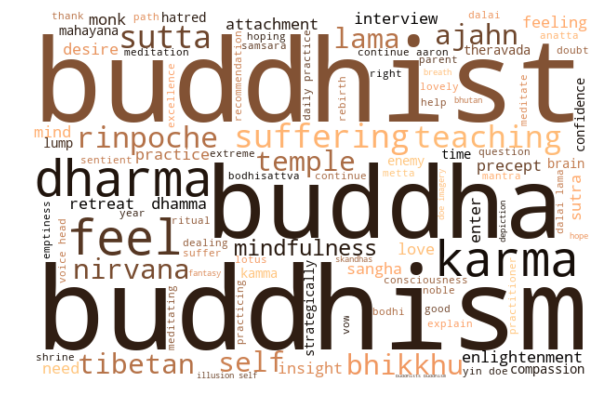

In [166]:
bud_words = bud_sorted['word'].head(100)
bud_coefs = bud_sorted['coef'].head(100)

# normalize in preparation of the word cloud
bud_norm = [num / sum(bud_coefs) for num in bud_coefs]

# create bag of words with importance for purpose of word cloud
bud_top = np.random.choice(bud_words , size = 10000 , p = bud_norm)
bud_wc = ' '.join(bud_top)

# word cloud
wc = WordCloud(background_color = 'white',width = 600 , height = 400,  colormap = 'copper').generate(bud_wc)
plt.figure(figsize = (10 , 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off');

- This word cloud displays the most indicative words that the logistic regression model used to predict posts being in the Buddhism subreddit specifically. These are the "give away" words for the Buddhism subreddit.

## Evaluate Best Random Forest

#### Read in Model Statistics

In [98]:
# read .pk file with model stats on best random forest model

rf_pack = pickle.load(open('./Best_Models/rf_package.pk' , 'rb'))
print(f"For the training data, this model produced a high R-squared score of {rf_pack['rf_pack'].best_score_}")

For the training data, this model produced a high R-squared score of 0.8630229419703104


An R-squared score of 0.8630 implies that this model predicted 86.30% the posts to be in their correct subreddit of the training data set.

#### Hashing Vectorize Testing Data Using Best Parameters

In [99]:
# transform X_test using best parameters in order to make predictions

tf = TfidfVectorizer(max_features = 30000, ngram_range = (1, 1), stop_words = 'english')

X_train_tf = tf.fit_transform(rf_pack['X_train'])
X_test_tf = tf.transform(rf_pack['X_test'])

#### Create Predictions

In [100]:
# calculate predictions

y_preds = rf_pack['rf_pack'].best_estimator_.named_steps['rf'].predict(X_test_tf)

#### Confusion Matrix

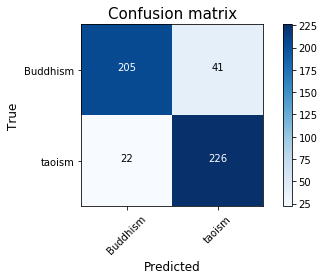

In [101]:
# create and plot a confusion matrix

cmrf = confusion_matrix(rf_pack['y_test'] , y_preds)
plot_confusion_matrix(cmrf, classes = rf_pack['y_test'].unique())

- The model predicted 22 posts to be in the Buddhism subreddit when they were actually in the Taoism subreddit.
- The model predicted 41 posts to be in the Taoism subreddit when they were actually in the Buddhism subreddit.
- The remaining 431 posts were classified correctly.

#### Fetch Most Important Tokens

In [113]:
# fetch feature importance produced by random forest
feature_import = rf_pack['rf_pack'].best_estimator_.named_steps['rf'].feature_importances_

# fetch each token 
tokens = rf_pack['rf_pack'].best_estimator_.named_steps['tf'].get_feature_names()

In [155]:
# put coefs into dataframe
tokens_importances = pd.DataFrame({'word': tokens, 'importance' : feature_import})
tokens_sorted = tokens_importances.sort_values('importance', ascending=False)
tokens_sorted.head(10)

,word,importance
9668,taoism,0.038701
1505,buddhism,0.036577
9666,tao,0.034143
9670,taoist,0.032469
1507,buddhist,0.028248
1499,buddha,0.017924
1804,ching,0.011369
9716,te,0.007530
9471,suffering,0.006409
2529,dao,0.005451


#### Visualize

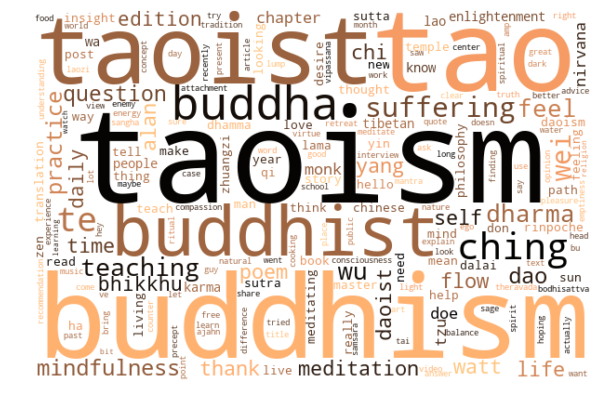

In [159]:
# create bag of words according to importance for word cloud
rf_words = np.random.choice(tokens_sorted['word'] , size = 10000 , p = tokens_sorted['importance'])
rf_wc = ' '.join(rf_words)

# word cloud
wc = WordCloud(background_color = 'white' , width = 600 , height = 400,  colormap = 'copper').generate(rf_wc)
plt.figure(figsize = (10 , 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off');

- This word cloud displays the most indicative words that the random forest model used to predict which subreddit each post was in.

## Conclusion

Classifying subreddits using a logistic regression, because of its low bias-variance tradeoff, large R-squared, and its high degree of interpretability using coefficients, is the best model produced by this study. A 92.5% accuracy score confirms the ability of this model to correctly classify a given post. By ranking the predictive power of each token based on coefficient magnitude, significant topics/themes of each subreddit can be drawn and interpreted. Using this kind of classification model allows for quick learning of the each topic. For instance, someone that knows very little about Buddhism and Taoism can take away frequently discussed key terms of both religions.
<br><br>
#### Further Research:
- Incorporate more classes (religions) to the model and evaluate accuracy
- Latent Dirichlet Allocation
    - Use LDA techniques to gather key topics of a collection of posts or any sort of corpus